# window 함수

## expanding and rolling

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline

In [33]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))

In [34]:
s

2015-01-01   -0.131592
2015-01-02   -1.366711
2015-01-03   -0.634533
2015-01-04    1.382962
2015-01-05    0.150582
                ...   
2017-09-22    0.461090
2017-09-23   -0.769161
2017-09-24    1.271183
2017-09-25   -1.130630
2017-09-26    0.330903
Freq: D, Length: 1000, dtype: float64

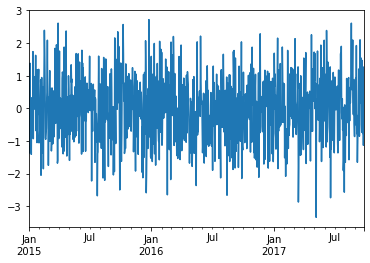

In [35]:
s.plot()

In [36]:
s = s.cumsum()

In [37]:
s

2015-01-01   -0.131592
2015-01-02   -1.498303
2015-01-03   -2.132836
2015-01-04   -0.749874
2015-01-05   -0.599292
                ...   
2017-09-22   -5.174208
2017-09-23   -5.943369
2017-09-24   -4.672186
2017-09-25   -5.802816
2017-09-26   -5.471913
Freq: D, Length: 1000, dtype: float64

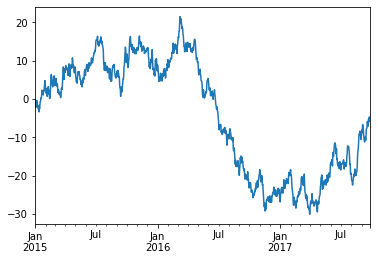

In [38]:
s.plot()

In [39]:
r = s.rolling(window=30) # 윈도우의 사이즈만큼 값을 이동시켜준다.

In [40]:
r

Rolling [window=30,center=False,axis=0]

In [41]:
r.mean()

2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
                ...   
2017-09-22   -8.594954
2017-09-23   -8.479359
2017-09-24   -8.333187
2017-09-25   -8.218469
2017-09-26   -8.122053
Freq: D, Length: 1000, dtype: float64

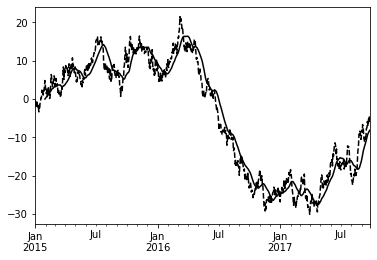

In [42]:
# 이동평균을 그릴때 rolling을 사용한다.
s.plot(style='k--')
r.mean().plot(style='k')

---

---

In [48]:
df = pd.DataFrame(np.random.randn(1000,4),
                  index=pd.date_range('1/1/2015',periods=1000),
                  columns=['A','B','C','D'])

In [49]:
df

,A,B,C,D
2015-01-01,1.408562,0.353954,-0.859463,-1.184924
2015-01-02,0.584977,-0.057336,0.259232,-3.498585
2015-01-03,0.482844,0.822510,-0.017943,0.873436
2015-01-04,0.177895,-1.067920,-1.233951,-0.280819
2015-01-05,-0.695543,-0.407341,0.475754,-0.595349
...,...,...,...,...
2017-09-22,-0.587257,0.126344,0.869079,2.703847
2017-09-23,1.079454,0.257775,-0.577928,0.414354
2017-09-24,-0.485194,0.467598,1.683982,-0.092711
2017-09-25,-0.834030,-0.054398,0.562380,-0.869239


In [50]:
df = df.cumsum() # 누적합 계산
df

,A,B,C,D
2015-01-01,1.408562,0.353954,-0.859463,-1.184924
2015-01-02,1.993539,0.296618,-0.600232,-4.683510
2015-01-03,2.476382,1.119128,-0.618174,-3.810073
2015-01-04,2.654278,0.051208,-1.852126,-4.090892
2015-01-05,1.958735,-0.356133,-1.376371,-4.686241
...,...,...,...,...
2017-09-22,25.169488,-18.173748,-5.530608,-8.938701
2017-09-23,26.248942,-17.915973,-6.108536,-8.524347
2017-09-24,25.763748,-17.448375,-4.424554,-8.617058
2017-09-25,24.929718,-17.502774,-3.862175,-9.486297


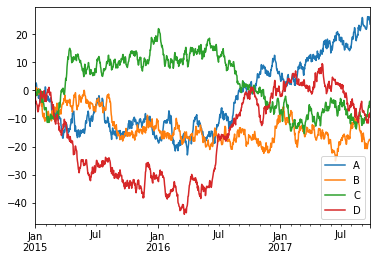

In [51]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc269967b50>,
      dtype=object)

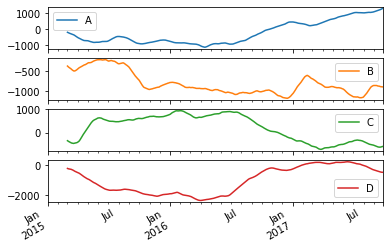

In [52]:
df.rolling(window=60).sum().plot(subplots=True)

In [55]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2015-01-01,1.408562,0.353954,-0.859463,-1.184924
2015-01-02,1.701050,0.325286,-0.729847,-2.934217
2015-01-03,1.959494,0.589900,-0.692623,-3.226169
2015-01-04,2.133190,0.455227,-0.982499,-3.442350
2015-01-05,2.098299,0.292955,-1.061273,-3.691128


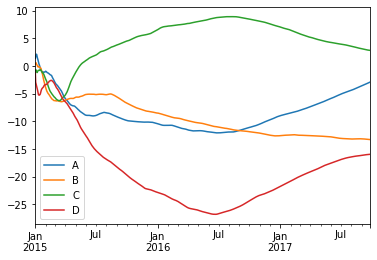

In [57]:
df.rolling(window=len(df), min_periods=1).mean().plot()

In [58]:
df.expanding(min_periods=1).mean()

,A,B,C,D
2015-01-01,1.408562,0.353954,-0.859463,-1.184924
2015-01-02,1.701050,0.325286,-0.729847,-2.934217
2015-01-03,1.959494,0.589900,-0.692623,-3.226169
2015-01-04,2.133190,0.455227,-0.982499,-3.442350
2015-01-05,2.098299,0.292955,-1.061273,-3.691128
...,...,...,...,...
2017-09-22,-3.013635,-13.275957,2.856594,-15.985188
2017-09-23,-2.984284,-13.280611,2.847602,-15.977704
2017-09-24,-2.955479,-13.284787,2.840315,-15.970329
2017-09-25,-2.927566,-13.289009,2.833606,-15.963838


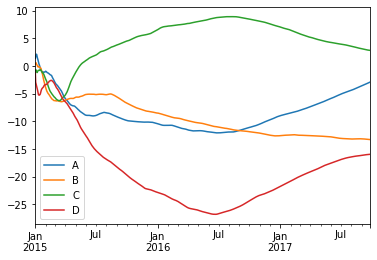

In [59]:
df.expanding(min_periods=1).mean().plot()

In [60]:
df.expanding?

In [67]:
dfe = pd.DataFrame({'B':[0,1,2,np.nan,4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


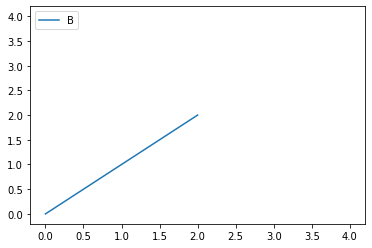

In [68]:
dfe.plot()

In [71]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


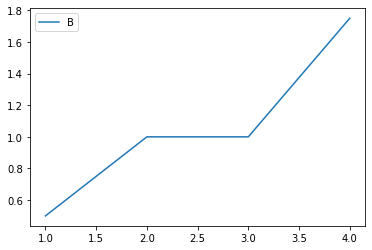

In [72]:
dfe.expanding(2).mean().plot()